In [1]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('CrabAgePrediction_Subset1.csv')


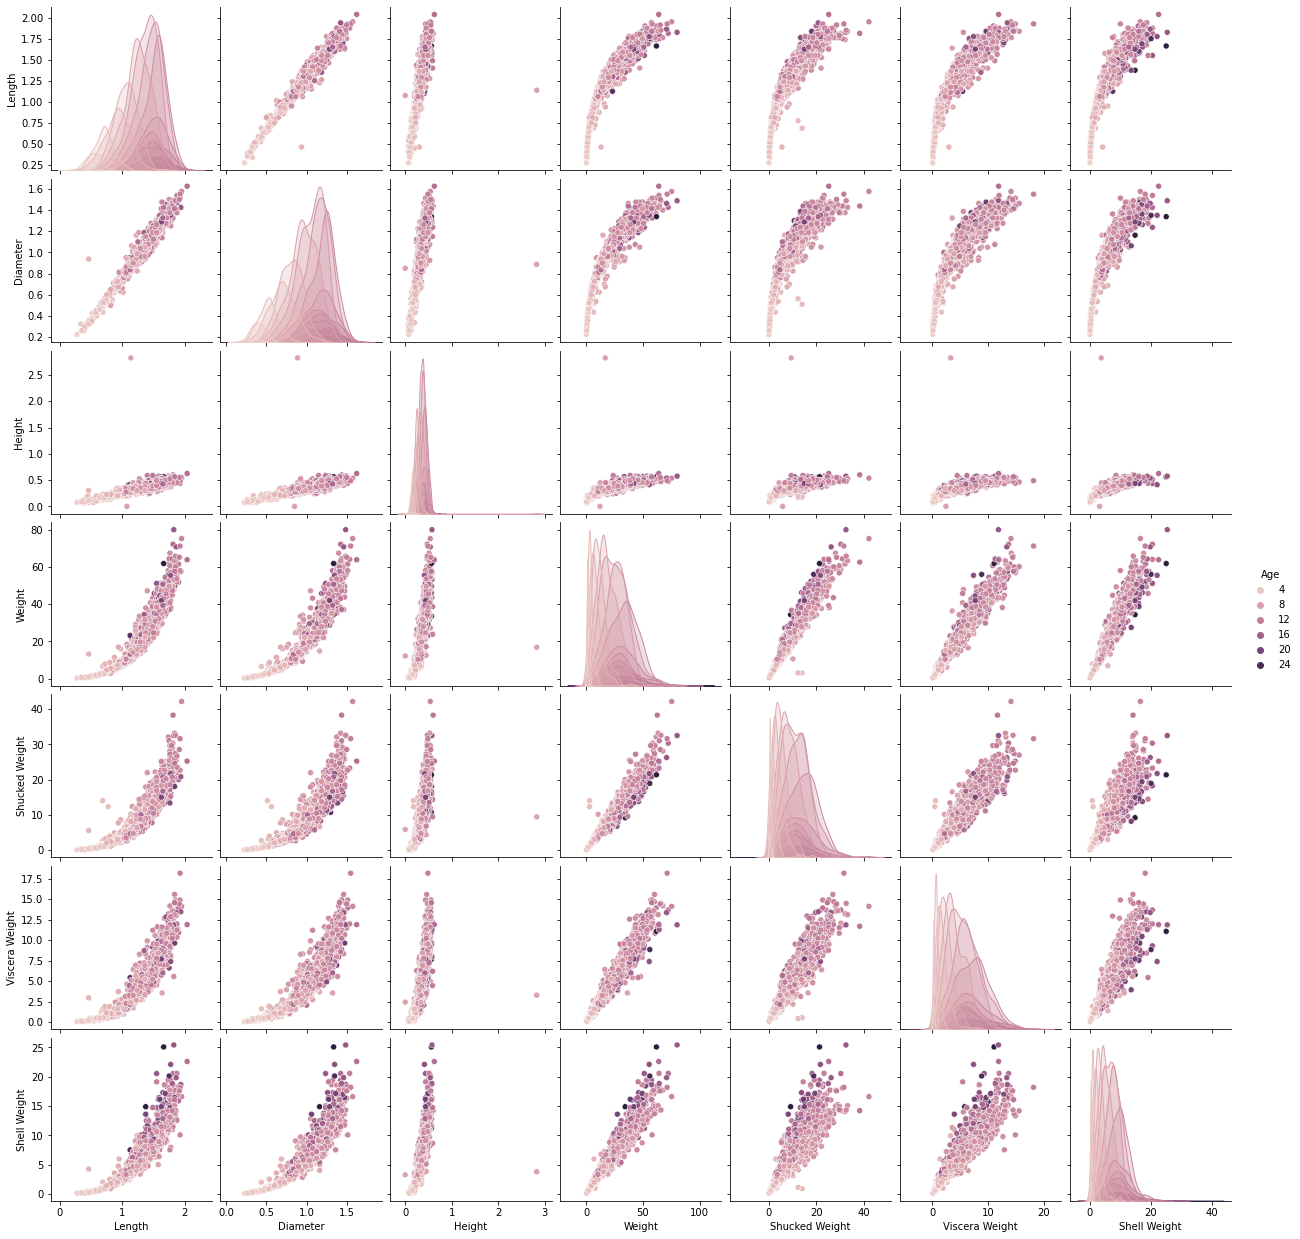

In [3]:
# Cargar el conjunto de datos Iris y convertirlo en un DataFrame

sns.pairplot(df, hue="Age", diag_kind="kde")

# Mostrar los diagramas de dispersión
plt.show()

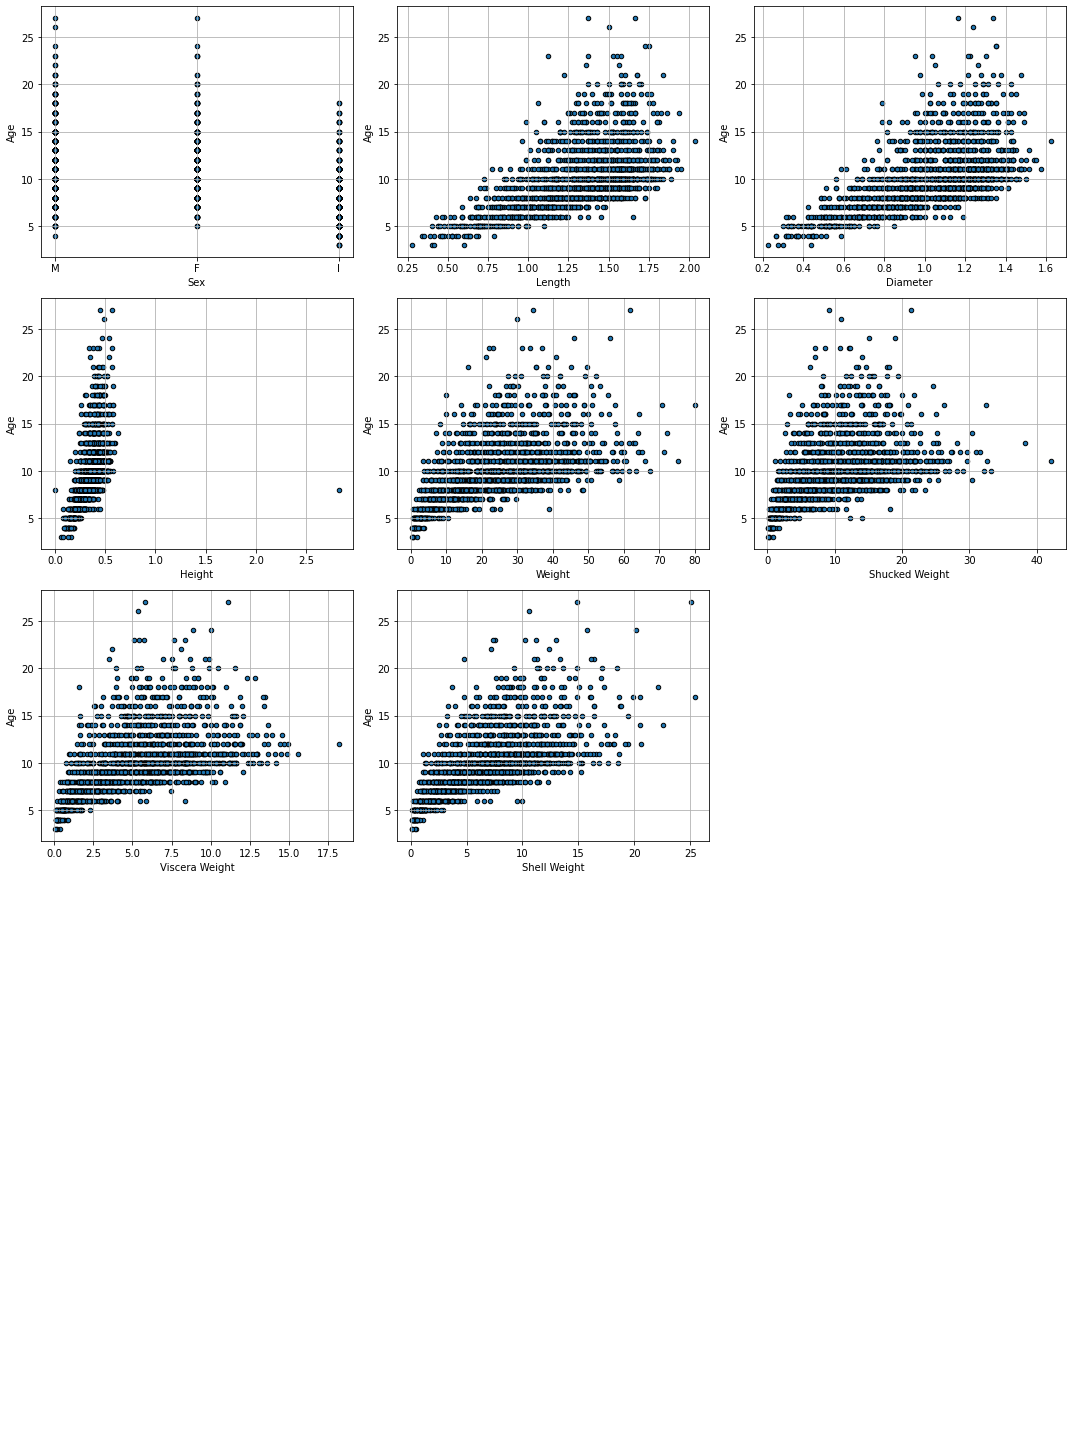

In [4]:
feature_names = ["Sex", "Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(df[feature_names[i]], df['Age'], edgecolor='k', s=20)
    ax.set_ylabel("Age")
    ax.set_xlabel(feature_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

### En nuestro primer caso vamos a tratar de generar un modelo lineal y uno polonómico para visualizar si con todo el conjunto de datos se puede crear un buen modelo o si es necesario descartar algunas variables

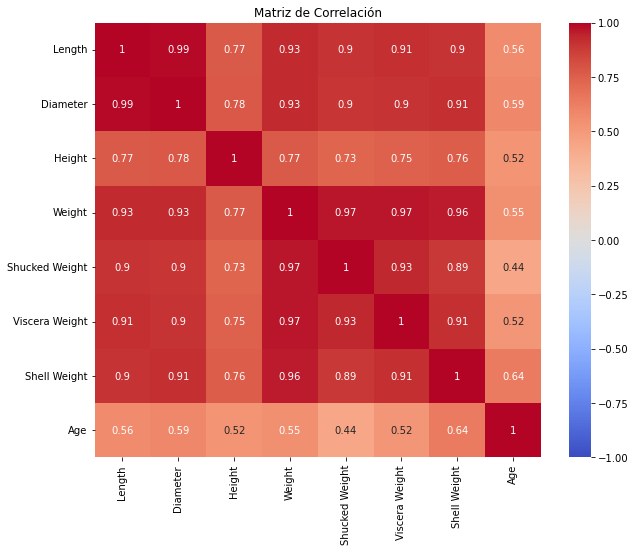

In [29]:
correlation_matrix = df.corr()
# Crear una figura y un eje (subplot)
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título al mapa de calor
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()



Antes de crear nuestros modelos queremos hacer una partición de los datos en 3, un conjunto de datos de entreno, uno de testeo y uno oculto para hacer la validación del modelo 

In [6]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1946 non-null   object 
 1   Length          1946 non-null   float64
 2   Diameter        1946 non-null   float64
 3   Height          1946 non-null   float64
 4   Weight          1946 non-null   float64
 5   Shucked Weight  1946 non-null   float64
 6   Viscera Weight  1946 non-null   float64
 7   Shell Weight    1946 non-null   float64
 8   Age             1946 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 137.0+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,1.315635,1.024942,0.351497,23.811388,10.295720,5.186851,6.878738,9.941932
std,0.301336,0.249574,0.111232,13.947888,6.246936,3.096338,3.995197,3.227806
min,0.275000,0.225000,0.000000,0.226796,0.070874,0.056699,0.085048,3.000000
25%,1.137500,0.875000,0.287500,12.902566,5.404123,2.721552,3.827183,8.000000
50%,1.362500,1.062500,0.362500,23.069406,9.631743,4.918638,6.761356,9.000000
75%,1.550000,1.212500,0.412500,33.115760,14.398002,7.253928,9.482908,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,18.186204,25.429502,27.000000


In [9]:
X = df.iloc[:, df.columns != 'Age' ]
X = X.drop(X.columns[0], axis = 1)
y = df['Age']

In [10]:
X


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432
1,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295
2,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336
3,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280
4,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834
...,...,...,...,...,...,...,...
1941,1.6500,1.3250,0.4250,39.419980,16.740380,6.010094,12.842323
1942,1.2875,1.0375,0.3500,19.660378,8.830869,4.309124,5.669900
1943,1.2375,0.9875,0.3000,15.677274,6.350288,3.898056,4.734367
1944,0.9250,0.7250,0.2000,7.214948,3.061746,1.601747,1.984465


In [11]:
linear_metrics = []
linear_no_variable_metrics = []
poly2_metrics = []
poly2_no_variable_metrics = []

In [12]:
X, X_oculto, y, y_oculto = train_test_split(X, y, test_size=0.2, random_state=0)

Empezaremos a desarrollar nuestro modelos


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

linear_metrics.append((mse, r2, rmse, mae))
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 4.364470918530769
R-squared (R²): 0.49001119901872225
Root Mean Squared Error (RMSE): 2.0891316182880315
Mean Absolute Error (MAE): 1.531755408992079


In [15]:
polynomial_degrees = [2, 3, 4, 5]
# Iterar sobre diferentes grados de polinomios
for degree in polynomial_degrees:
    # Crear objeto de transformación polinómica
    polynomial_features = PolynomialFeatures(degree=degree)

    # Transformar las características a un espacio polinómico
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X_train_poly, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular métricas de desempeño
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    if degree == 2: poly2_metrics.append((mse, r2, rmse, mae))
    
    # Imprimir métricas para el grado de polinomio actual
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("===============================")

Polynomial Degree: 2
Mean Squared Error (MSE): 3.9499350874856867
R-squared (R²): 0.5384497464130593
Root Mean Squared Error (RMSE): 1.9874443608528232
Mean Absolute Error (MAE): 1.44520071122215
Polynomial Degree: 3
Mean Squared Error (MSE): 11.0359177481458
R-squared (R²): -0.28954793494179687
Root Mean Squared Error (RMSE): 3.3220351816538307
Mean Absolute Error (MAE): 1.755757620298888
Polynomial Degree: 4
Mean Squared Error (MSE): 1366.6248665444848
R-squared (R²): -158.69023281173392
Root Mean Squared Error (RMSE): 36.96788966852834
Mean Absolute Error (MAE): 6.727890782425184
Polynomial Degree: 5
Mean Squared Error (MSE): 24960688.61551724
R-squared (R²): -2916657.60451647
Root Mean Squared Error (RMSE): 4996.067314950554
Mean Absolute Error (MAE): 332.6720917765212


Durante el proceso de exploración de los modelos, se ha observado que tanto el modelo lineal como el modelo polinómico de grado 2 ofrecen la mejor aproximación para este caso. Sin embargo, al considerar la métrica R^2, se ha evidenciado que estos modelos presentan una confiabilidad limitada. Basándonos en análisis previos de los datos, surge la hipótesis de que ciertas variables podrían ser redundantes, lo que posiblemente conduce a un sobreajuste en los resultados.

En vista de esta situación, hemos decidido repetir el experimento con algunas modificaciones. En primer lugar, eliminaremos la variable 'weight', ya que tras examinar la matriz de correlación, hemos identificado que esta variable muestra una correlación sumamente alta (casi 1) con los parámetros 'Shucked Weight', 'Viscera Weight' y 'Shell Weight'.

Este enfoque nos permitirá explorar si la eliminación de estas variables redundantes tiene un impacto positivo en la confiabilidad de los modelos y si contribuye a mitigar el problema de sobreajuste que hemos identificado.     

In [16]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


In [17]:
X = df.iloc[:, df.columns != 'Age' ]
X = X.drop(X.columns[[0, 4]], axis = 1)
y = df['Age']

In [18]:
X


,Length,Diameter,Height,Shucked Weight,Viscera Weight,Shell Weight
0,1.6250,1.3000,0.4375,17.434942,7.866986,9.525432
1,1.4875,1.0750,0.5250,18.512224,11.226402,11.623295
2,1.3875,1.1125,0.4375,15.620575,6.917278,7.895336
3,0.9875,0.7500,0.3000,3.586212,1.927766,2.537280
4,0.9375,0.7250,0.3500,3.968930,1.771844,2.338834
...,...,...,...,...,...,...
1941,1.6500,1.3250,0.4250,16.740380,6.010094,12.842323
1942,1.2875,1.0375,0.3500,8.830869,4.309124,5.669900
1943,1.2375,0.9875,0.3000,6.350288,3.898056,4.734367
1944,0.9250,0.7250,0.2000,3.061746,1.601747,1.984465


In [34]:
X, X_oculto, y, y_oculto = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

linear_no_variable_metrics.append((mse, r2, rmse, mae))

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [37]:
polynomial_degrees = [2, 3, 4, 5]
# Iterar sobre diferentes grados de polinomios
for degree in polynomial_degrees:
    # Crear objeto de transformación polinómica
    polynomial_features = PolynomialFeatures(degree=degree)

    # Transformar las características a un espacio polinómico
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X_train_poly, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular métricas de desempeño
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    if degree == 2: poly2_no_variable_metrics.append((mse, r2, rmse, mae))    
    # Imprimir métricas para el grado de polinomio actual
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("===============================")

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# Convertir las listas en arrays para facilitar el procesamiento
linear_metrics = np.array(linear_metrics)
linear_no_variable_metrics = np.array(linear_no_variable_metrics)
poly2_metrics = np.array(poly2_metrics)
poly2_no_variable_metrics = np.array(poly2_no_variable_metrics)

# Etiquetas para las métricas
metric_labels = ['MSE', 'R²', 'RMSE', 'MAE']

# Crear un gráfico de barras comparativo
x = np.arange(len(metric_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width*1.5, linear_metrics.mean(axis=0), width, label='Modelo lineal')
rects2 = ax.bar(x - width/2, linear_no_variable_metrics.mean(axis=0), width, label='Modelo lineal sin variable')
rects3 = ax.bar(x + width/2, poly2_metrics.mean(axis=0), width, label='Modelo polinómico (grado 2)')
rects4 = ax.bar(x + width*1.5, poly2_no_variable_metrics.mean(axis=0), width, label='Modelo polinómico (grado 2) sin variable')

ax.set_ylabel('Promedio')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()

fig.tight_layout()

plt.show()

Como podemos observar, el modelo de grado dos exhibe el menor error según nuestras métricas y un valor R² más alto. Al comparar los modelos con y sin la variable "weight", notamos una leve mejora al eliminarla, lo que resulta en un R² de 0.503. No obstante, este resultado aún no representa un modelo verdaderamente preciso.

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [39]:


polynomial_features = PolynomialFeatures(degree=2)

# Transformar las características a un espacio polinómico
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_poly, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_poly)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

if degree == 2: poly2_no_variable_metrics.append((mse, r2, rmse, mae))    
# Imprimir métricas para el grado de polinomio actual



print(f"Coeficientes{model.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

AttributeError: 'numpy.ndarray' object has no attribute 'append'

https://www.kaggle.com/code/nasruddinaz/crustage-crab-age-prediction-with-regression

los resultados de este estudio difieren en muy poco comparado con el nuestro 

In [40]:
from sklearn.model_selection import KFold

num_folds = 5

# Crear el objeto KFold para dividir los datos
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inicializar listas para almacenar las métricas
mse_scores = []
r2_scores = []
rmse_scores = []
mae_scores = []

# Realizar k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    # Obtener conjuntos de entrenamiento y validación
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Crear objetos PolynomialFeatures y transformar las características
    polynomial_features = PolynomialFeatures(degree=2)
    X_train_poly = polynomial_features.fit_transform(X_train_fold)
    X_val_poly = polynomial_features.transform(X_val_fold)
    
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train_fold)
    
    # Realizar predicciones en el conjunto de validación
    y_pred_val = model.predict(X_val_poly)
    
    # Calcular métricas de desempeño para el fold actual
    mse_fold = mean_squared_error(y_val_fold, y_pred_val)
    r2_fold = r2_score(y_val_fold, y_pred_val)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    
    # Agregar las métricas a las listas
    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Calcular el promedio de las métricas
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)

print(f"Promedio Mean Squared Error (MSE): {avg_mse}")
print(f"Promedio R-squared (R²): {avg_r2}")
print(f"Promerdio Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Promedio Mean Absolute Error (MAE): {avg_mae}")

Promedio Mean Squared Error (MSE): 6.254405286132078
Promedio R-squared (R²): 0.3872870025940494
Promerdio Root Mean Squared Error (RMSE): 4.583219041667945
Promedio Mean Absolute Error (MAE): 1.82488101260961


In [41]:
y_pred_oculto = model.predict(X_oculto.transform(X_val_fold))
mse_fold = mean_squared_error(y_pred_oculto, y_oculto)
r2_fold = r2_score(y_pred_oculto, y_oculto)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 28 features as input.